In [70]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier

In [71]:
dataset = pd.read_csv('HR_comma_sep.csv')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
Department               14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [72]:
dataset.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [73]:
dataset.isnull().any()

satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
left                     False
promotion_last_5years    False
Department               False
salary                   False
dtype: bool

In [74]:
dataset.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000236ABCAED68>,
      dtype=object)

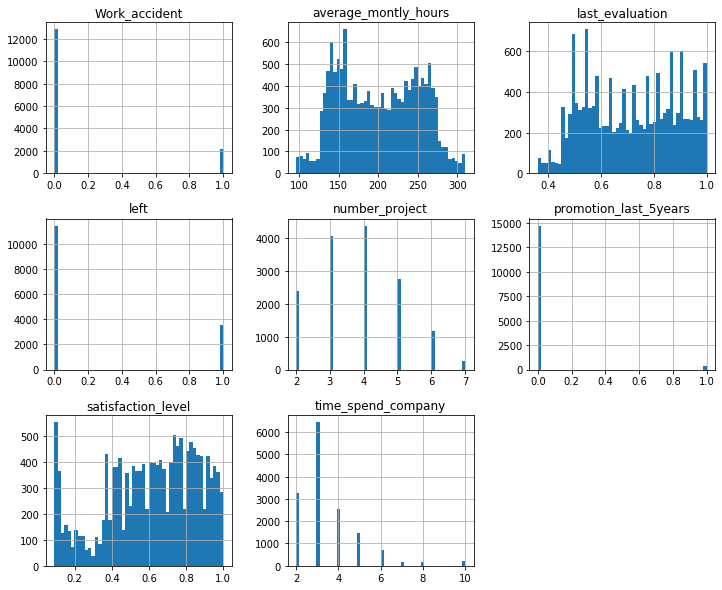

In [75]:
dataset.hist(bins = 50, figsize = (12, 10))

In [76]:
train_set, test_set = train_test_split(dataset, test_size = 0.2, random_state = 42)

In [77]:
train_set.left.value_counts()/ len(train_set)

0    0.76123
1    0.23877
Name: left, dtype: float64

In [78]:
test_set.left.value_counts() / len(test_set)

0    0.764667
1    0.235333
Name: left, dtype: float64

In [79]:
hr_analytics = train_set.copy()

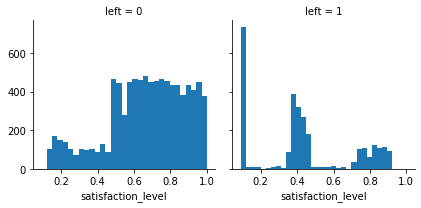

In [80]:
g = sns.FacetGrid(hr_analytics, col = 'left')
g.map(plt.hist, 'satisfaction_level', bins = 30)

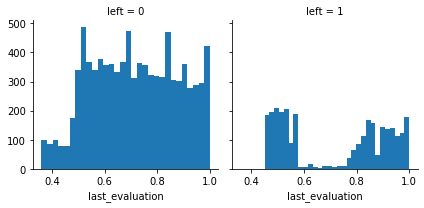

In [81]:
g = sns.FacetGrid(hr_analytics, col = 'left', height = 3.0)
g.map(plt.hist, 'last_evaluation', bins = 30)

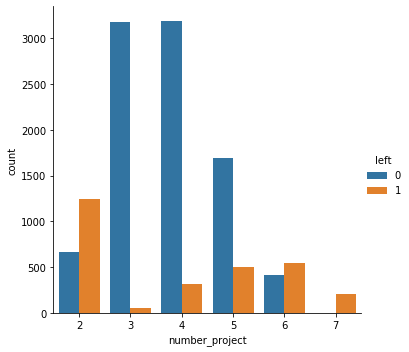

In [82]:
sns.catplot(x = 'number_project', hue = 'left', kind = 'count', data = hr_analytics)

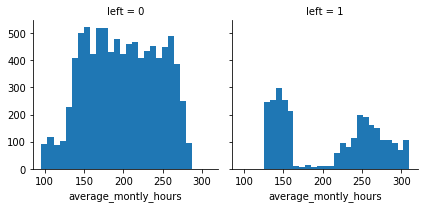

In [83]:
g = sns.FacetGrid(hr_analytics, col = 'left', height = 3.0)
g.map(plt.hist, 'average_montly_hours', bins = 25)

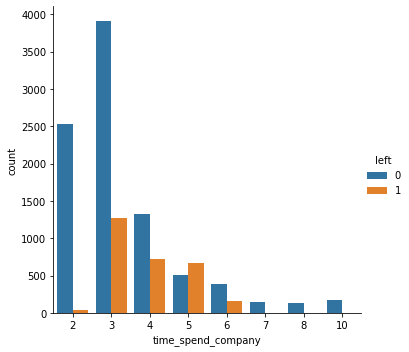

In [84]:
sns.catplot(x = 'time_spend_company', hue = 'left', kind = 'count', data = hr_analytics)

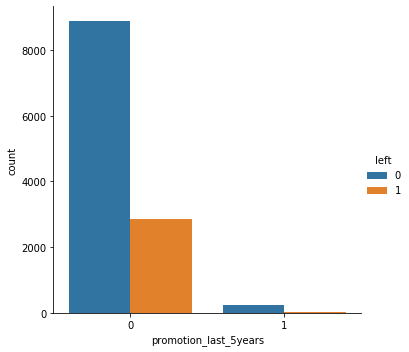

In [85]:
sns.catplot(x = 'promotion_last_5years', hue = 'left', kind = 'count', data = hr_analytics)

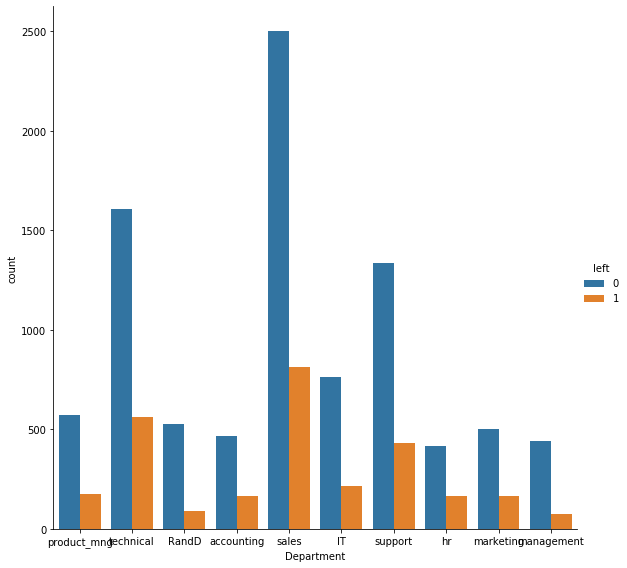

In [86]:
sns.catplot(x = 'Department', hue = 'left', kind = 'count', data = hr_analytics, height = 8)

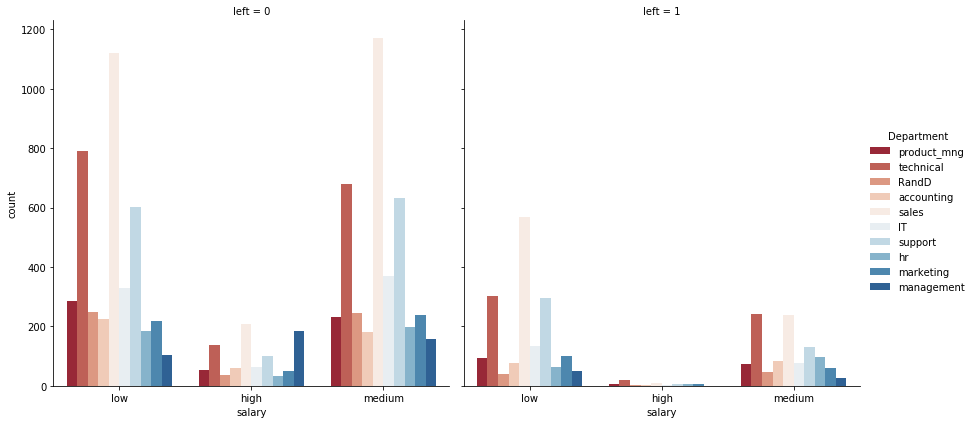

In [87]:
sns.catplot(x = 'salary', hue = 'Department', col = 'left', kind = 'count', data = hr_analytics, height = 6, palette = 'RdBu')

In [88]:
corr_matrix = hr_analytics.corr()
corr_matrix.left.sort_values(ascending = False)

left                     1.000000
time_spend_company       0.142801
average_montly_hours     0.080327
number_project           0.032300
last_evaluation          0.008796
promotion_last_5years   -0.062680
Work_accident           -0.154574
satisfaction_level      -0.394824
Name: left, dtype: float64

In [89]:
hr_analytics[['Department', 'left']].groupby('Department').mean().sort_values(ascending = False, by = 'left')

,left
Department,
hr,0.285223
accounting,0.264241
technical,0.259549
marketing,0.248132
sales,0.246005
support,0.243488
product_mng,0.233871
IT,0.220287
RandD,0.146774


In [90]:
hr_analytics[['salary', 'left']].groupby('salary').mean().sort_values(ascending = False, by = 'left')

,left
salary,
low,0.296131
medium,0.207423
high,0.063008


In [91]:
hr_analytics = train_set.drop('left', axis = 1)
hr_analytics_labels = train_set.iloc[:, 6].copy()

In [92]:
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [93]:
num_attribs = ['satisfaction_level', 'Work_accident', 'time_spend_company']

num_pipeline = Pipeline([
    ('selector', DataFrameSelector(num_attribs)),
    ('scaler', StandardScaler())
])

In [94]:
cat_attribs = ['salary', 'Department']

cat_pipeline = Pipeline([
    ('selector', DataFrameSelector(cat_attribs)),
    ('onehotencoder', OneHotEncoder(sparse = False))
])

In [95]:
preprocess_pipeline = FeatureUnion(transformer_list=[
    ('num_pipeline', num_pipeline),
    ('cat_pipeline', cat_pipeline)
])

In [96]:
hr_analytics_prepared = preprocess_pipeline.fit_transform(hr_analytics)

In [97]:
log_clf = LogisticRegression()
log_scores = cross_val_score(log_clf, hr_analytics_prepared, hr_analytics_labels, cv = 10)
log_scores.mean()

C:\Program Files\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to

0.7694004824540388

In [98]:
knn_clf = KNeighborsClassifier()
knn_scores = cross_val_score(knn_clf, hr_analytics_prepared, hr_analytics_labels, cv = 10)
knn_scores.mean()

0.933160721928742

In [99]:
tree_clf = DecisionTreeClassifier()
tree_scores = cross_val_score(tree_clf, hr_analytics_prepared, hr_analytics_labels, cv = 10)
tree_scores.mean()

0.9503295515020034

In [100]:
forest_clf = RandomForestClassifier()
forest_scores = cross_val_score(forest_clf, hr_analytics_prepared, hr_analytics_labels, cv = 10)
forest_scores.mean()

C:\Program Files\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\ensemble\forest

0.9546630958887239

In [101]:
gnb_clf= GaussianNB()
gnb_scores = cross_val_score(gnb_clf, hr_analytics_prepared, hr_analytics_labels, cv = 10)
gnb_scores.mean()

0.673559518733462

In [102]:
adaboost_clf= AdaBoostClassifier()
adaboost_scores = cross_val_score(adaboost_clf, hr_analytics_prepared, hr_analytics_labels, cv = 10)
adaboost_scores.mean()

0.928494399417407

,Model,Score
3,Random Forest Classifier,0.954663
2,Decision Tree Classifier,0.950330
1,KNN Classifier,0.933161
5,AdaBoost,0.928494
0,Logistic Regression,0.769400
4,Gaussian Naive Bayes,0.673560


In [112]:
voting_clf = VotingClassifier(estimators=[('rf', forest_clf), ('dt', tree_clf), ('knn', knn_clf), ('ada', adaboost_clf)],voting='soft')
voting_scores = cross_val_score(voting_clf, hr_analytics_prepared, hr_analytics_labels, cv=10)
voting_scores.mean()

C:\Program Files\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\ensemble\forest

0.954996776502391

In [113]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN Classifier', 'Decision Tree Classifier', 'Random Forest Classifier', 'Gaussian Naive Bayes', 'AdaBoost', 'Voting Classifier'],
    'Score': [log_scores.mean(), knn_scores.mean(), tree_scores.mean(), forest_scores.mean(), gnb_scores.mean(), adaboost_scores.mean(), voting_scores.mean()]
})
models.sort_values(by = 'Score', ascending=False)

,Model,Score
6,Voting Classifier,0.954997
3,Random Forest Classifier,0.954663
2,Decision Tree Classifier,0.950330
1,KNN Classifier,0.933161
5,AdaBoost,0.928494
0,Logistic Regression,0.769400
4,Gaussian Naive Bayes,0.673560
